# Examples using SEVIIR and IMERG data

In [1]:
import matplotlib.pyplot as plt
import xarray as xr

## Load and plot SEVIRI level 1.5 data

Download (for now from Gdrive) the SEVIRI data (approx 300 MB)

In [2]:
!curl -L -o seviri_openmrg2.nc "https://drive.usercontent.google.com/download?id=1aeSovV7K-H5i0sHmpdqFYHsX0zgHmRXC&confirm=yes"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  308M  100  308M    0     0  14.7M      0  0:00:20  0:00:20 --:--:-- 16.1M


In [3]:
ds_seviri = xr.open_dataset('seviri_openmrg2.nc')
ds_seviri

<xarray.Dataset> Size: 2GB
Dimensions:  (t: 8754, y: 44, x: 99)
Coordinates:
    lat      (y, x) float64 35kB ...
    lon      (y, x) float64 35kB ...
    time     (t) datetime64[ns] 70kB ...
Dimensions without coordinates: t, y, x
Data variables:
    WV_062   (t, y, x) int32 153MB ...
    IR_097   (t, y, x) int32 153MB ...
    VIS008   (t, y, x) int32 153MB ...
    IR_134   (t, y, x) int32 153MB ...
    WV_073   (t, y, x) int32 153MB ...
    VIS006   (t, y, x) int32 153MB ...
    IR_039   (t, y, x) int32 153MB ...
    IR_087   (t, y, x) int32 153MB ...
    IR_120   (t, y, x) int32 153MB ...
    IR_016   (t, y, x) int32 153MB ...
    IR_108   (t, y, x) int32 153MB ...

In [4]:
# TODO: Update the NetCDF file so that we do not have to do this here
ds_seviri = (
    ds_seviri.rename_vars({'time': 'foo'})
    .rename_dims({'t': 'time'})
    .rename_vars({'foo': 'time'})
)

In [5]:
%%time
ds_seviri = ds_seviri.load()

CPU times: user 6.36 s, sys: 452 ms, total: 6.82 s
Wall time: 6.93 s


### Plot min, max, mean and NaN count of all channels

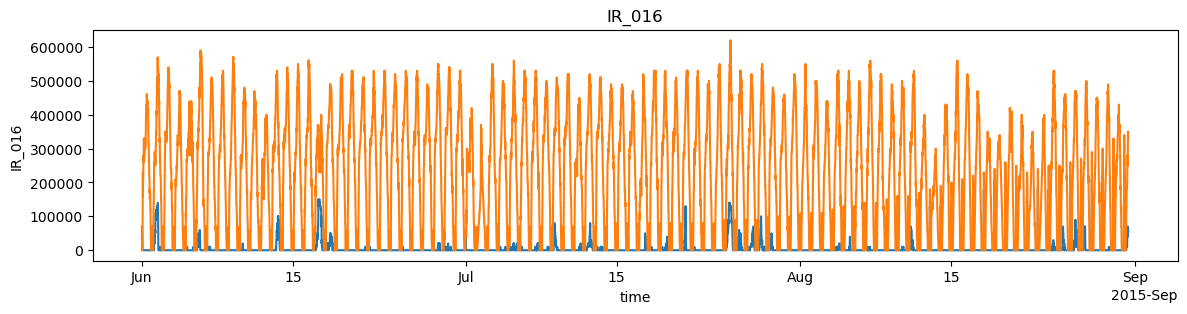

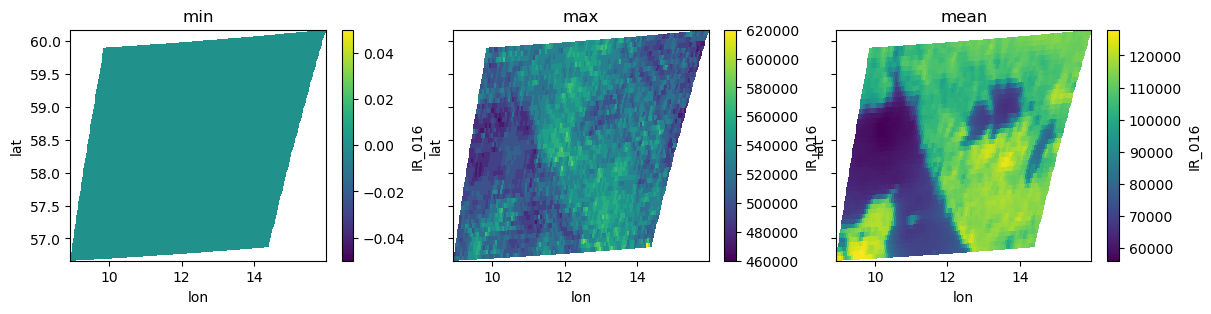

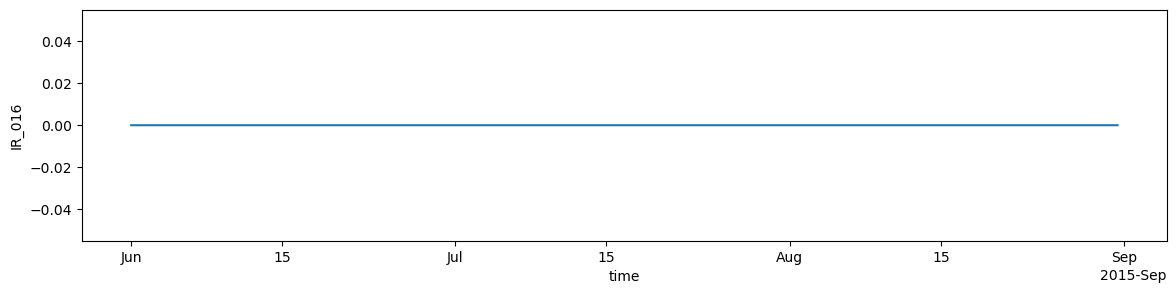

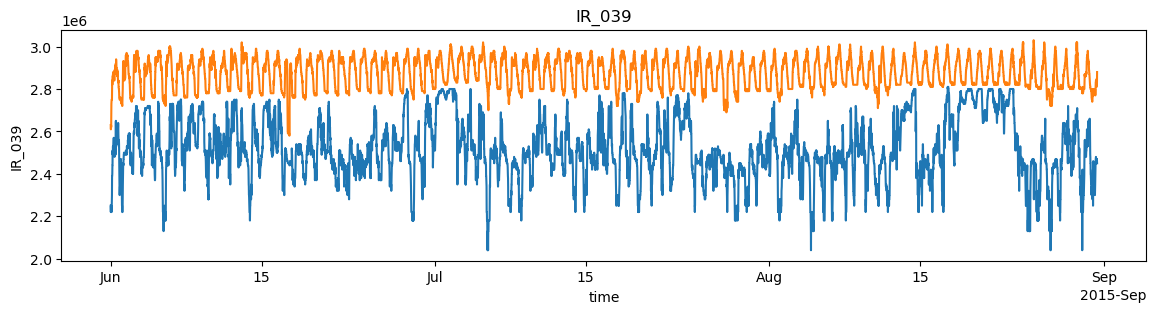

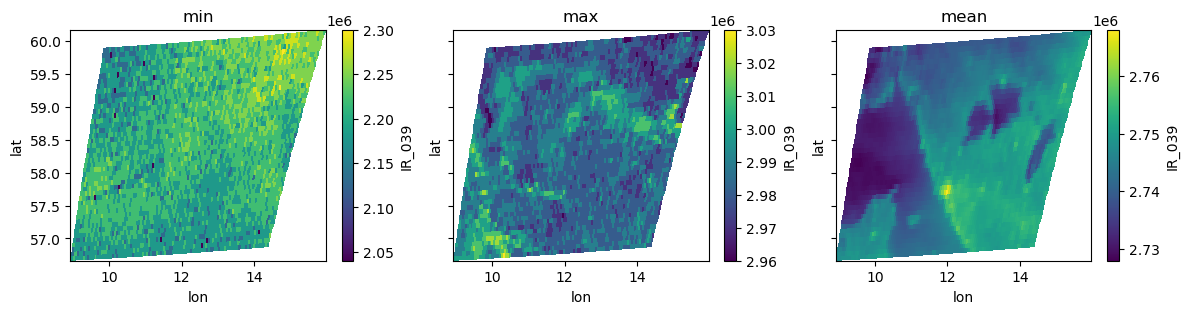

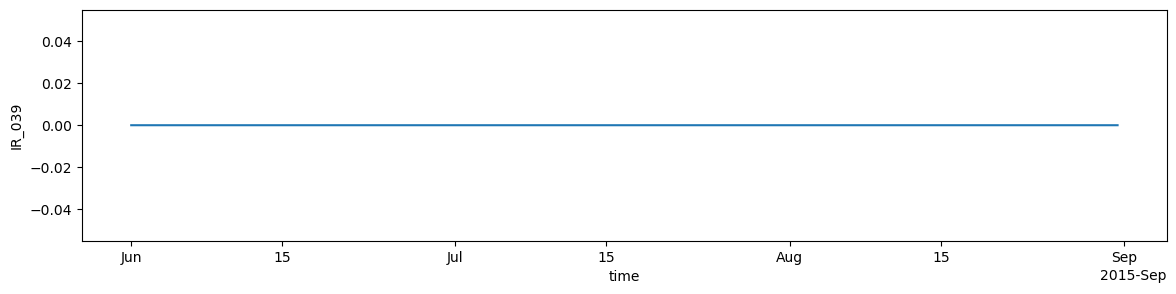

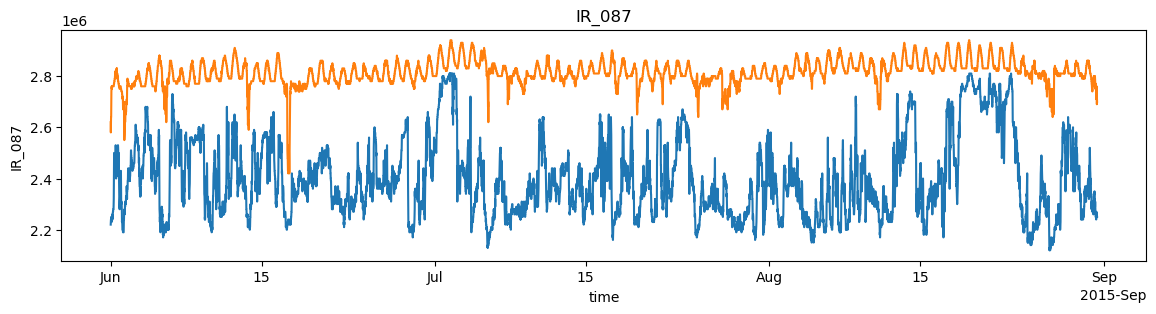

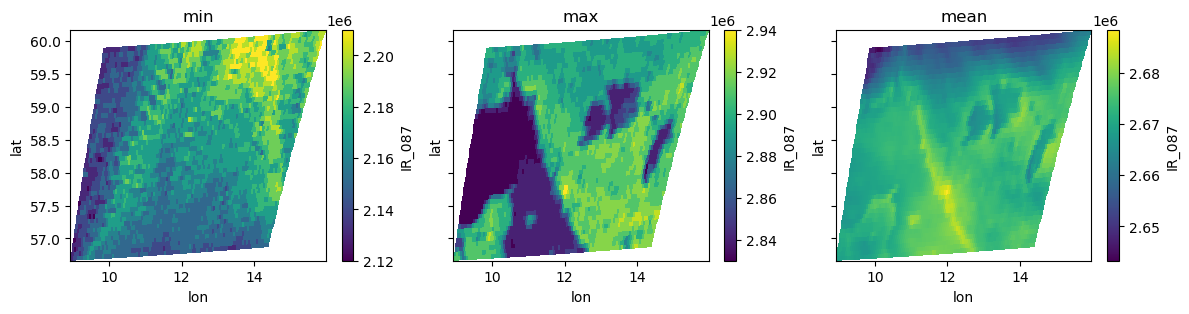

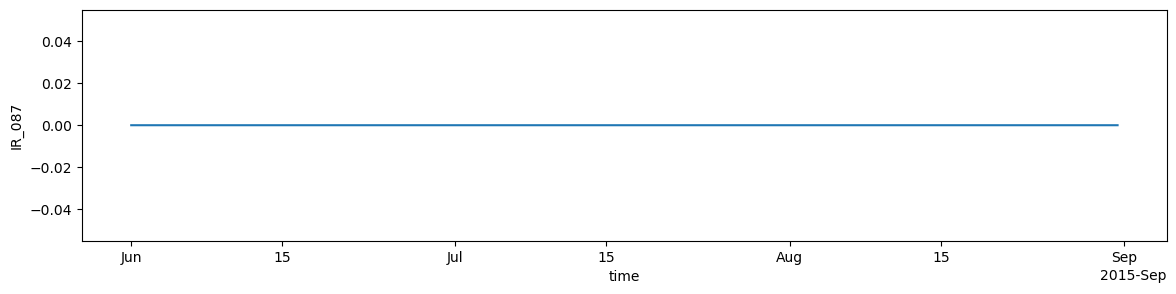

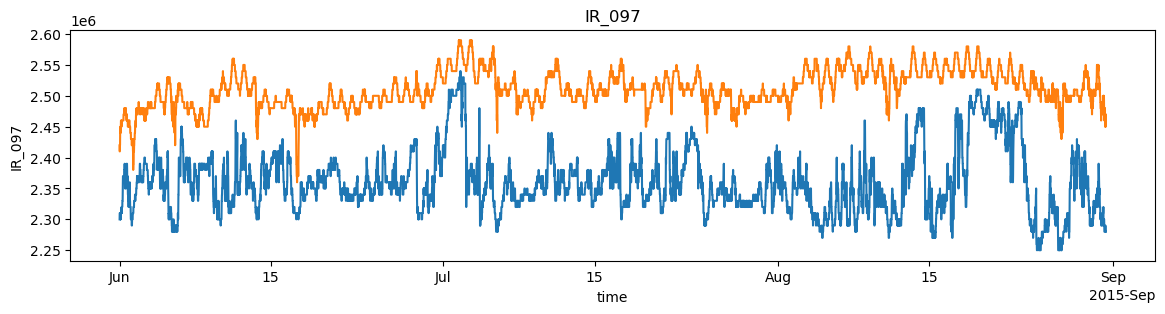

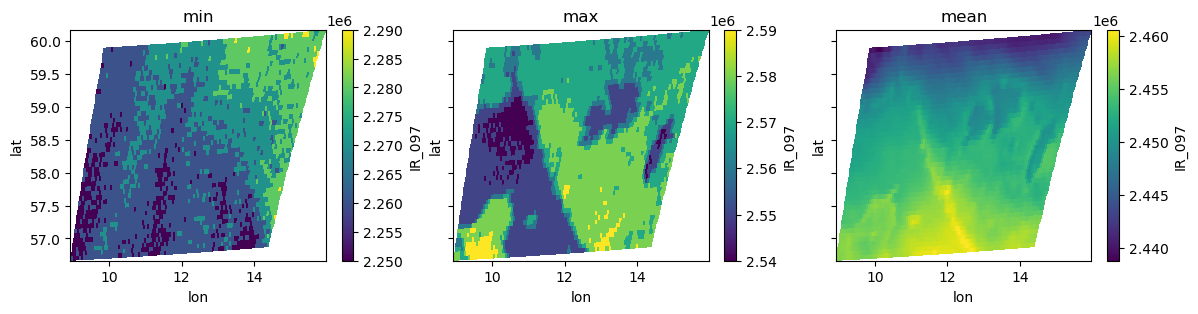

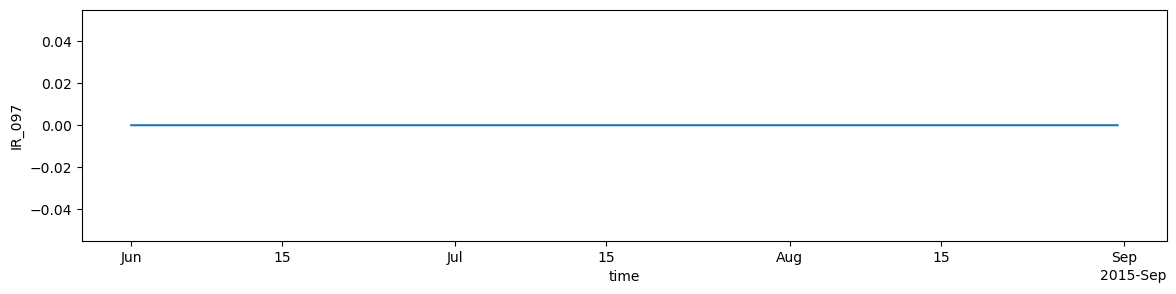

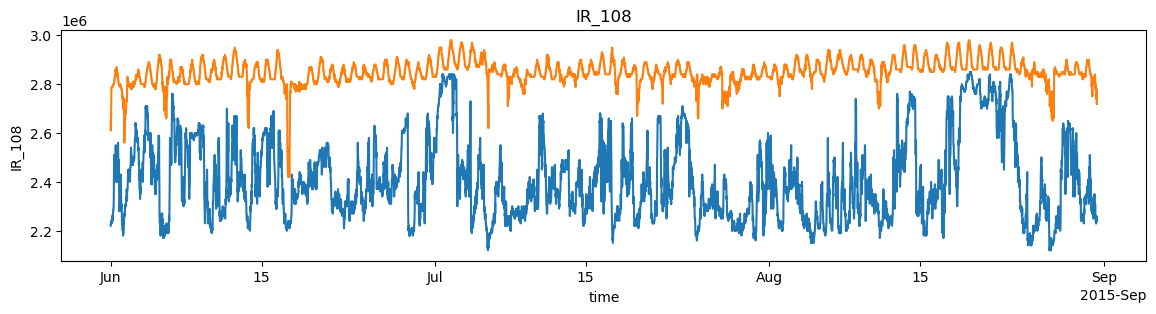

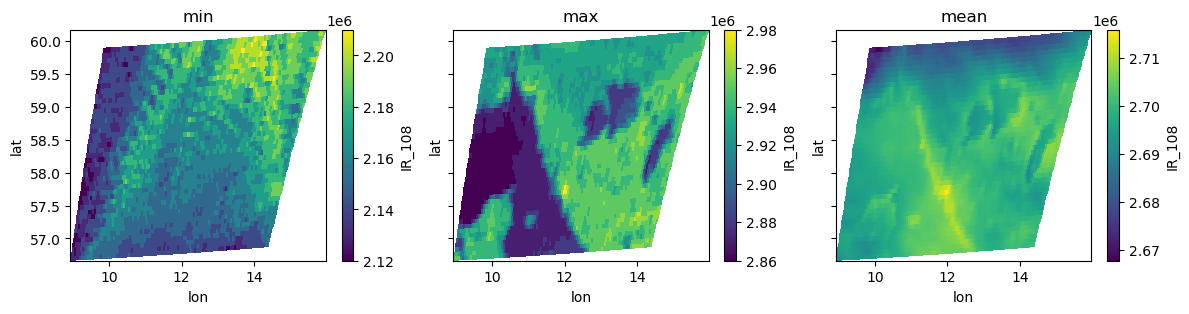

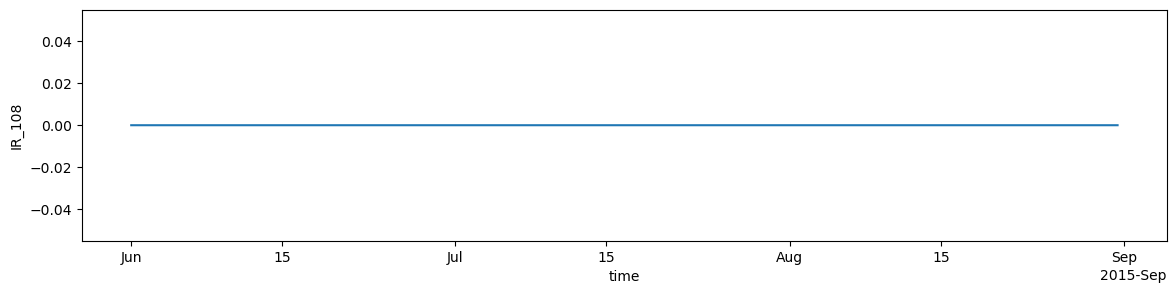

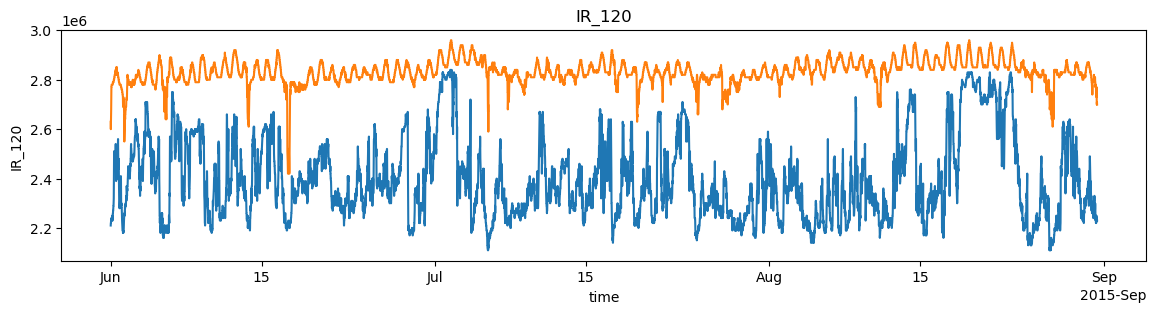

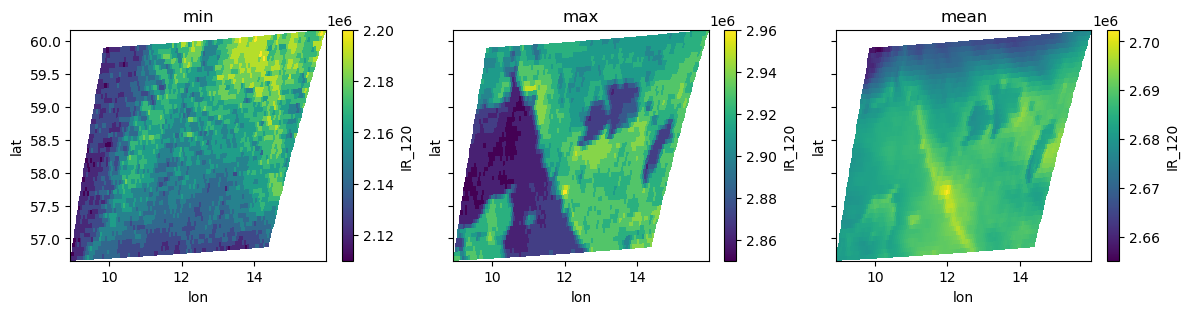

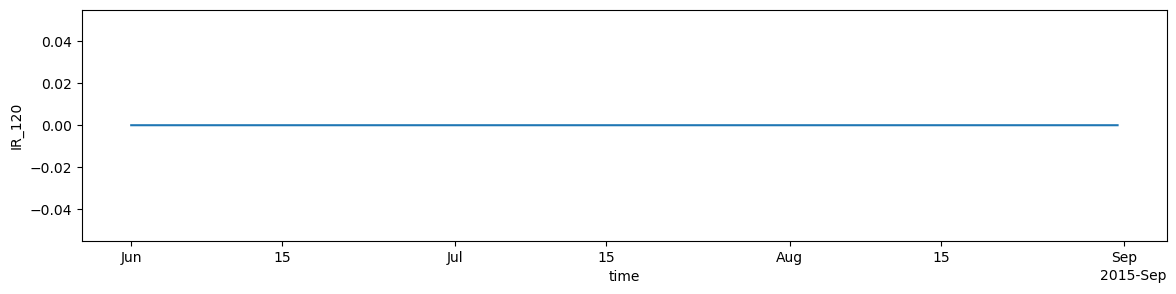

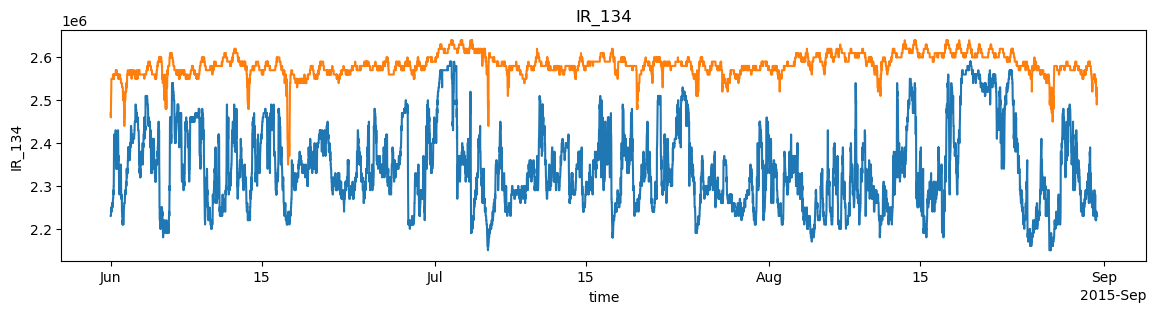

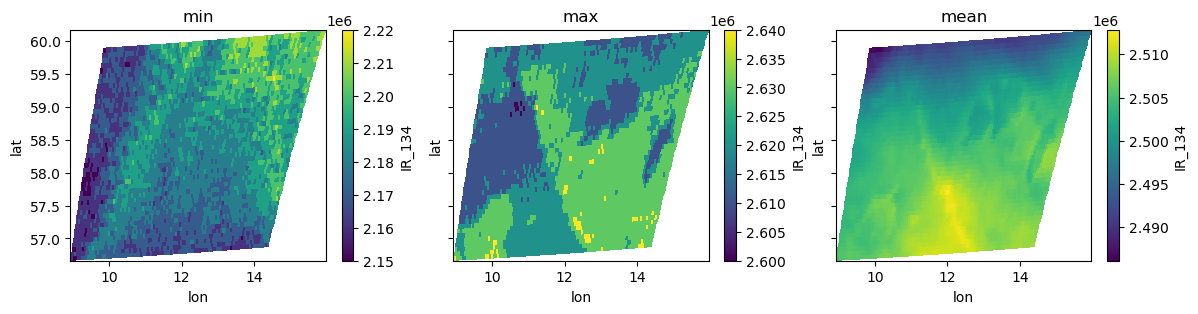

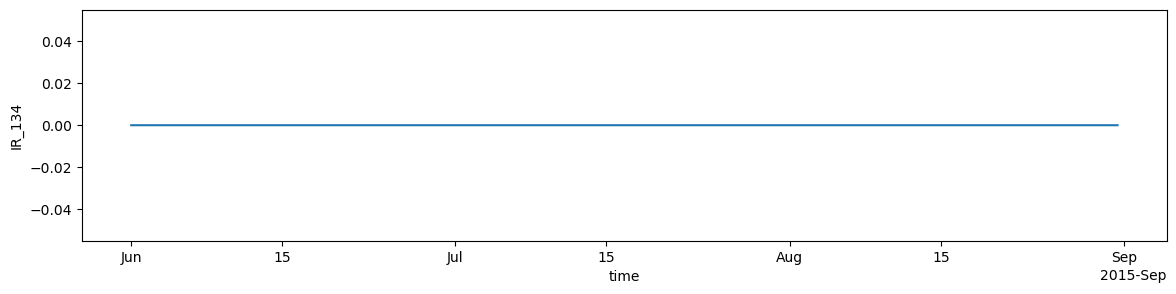

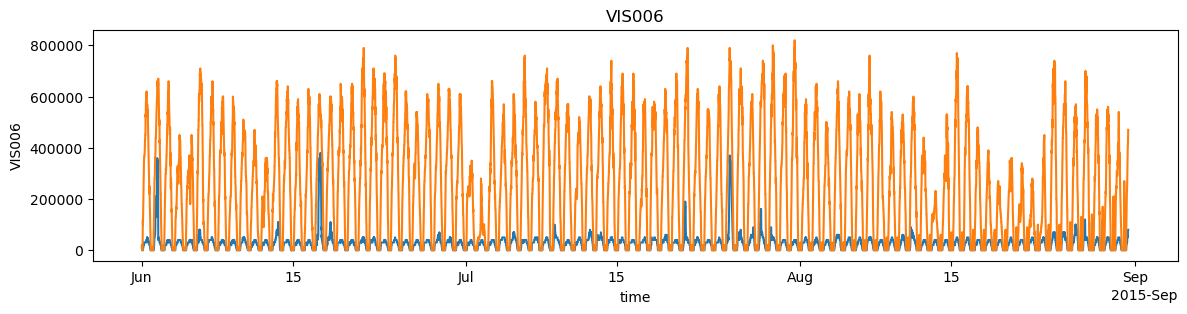

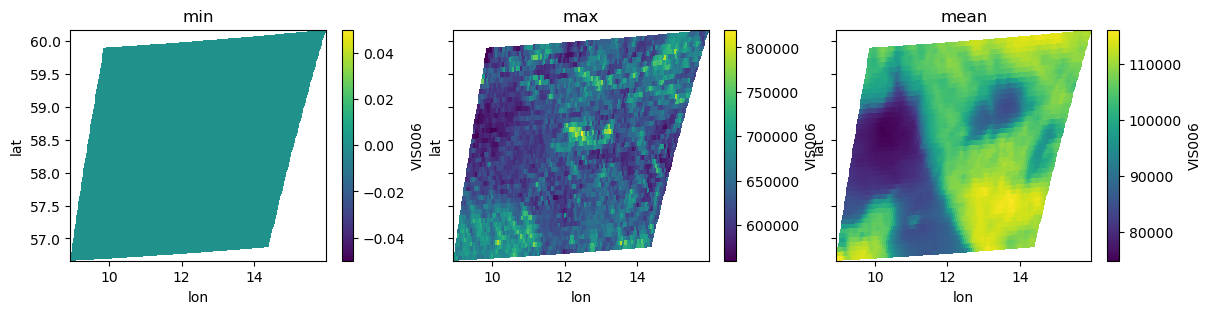

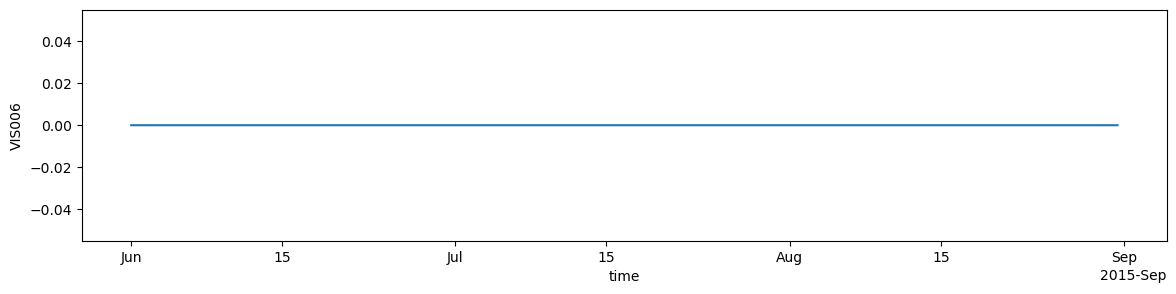

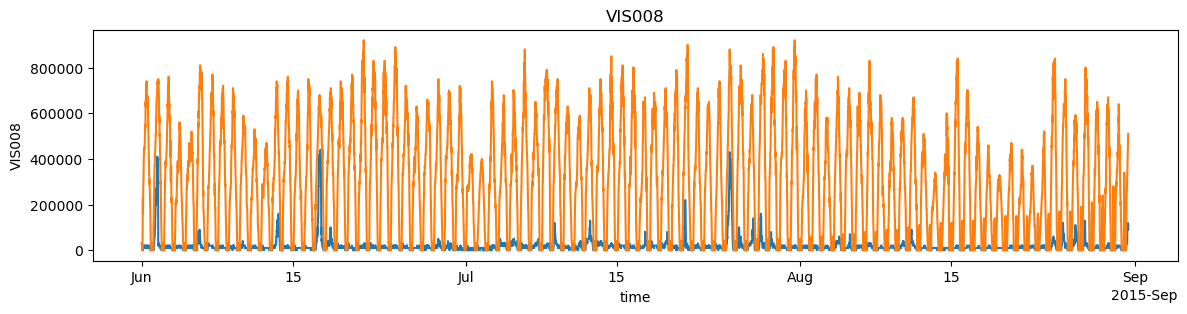

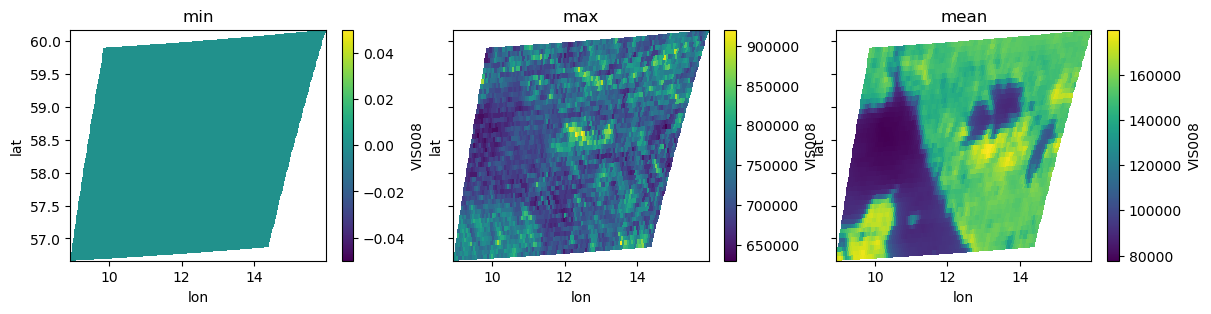

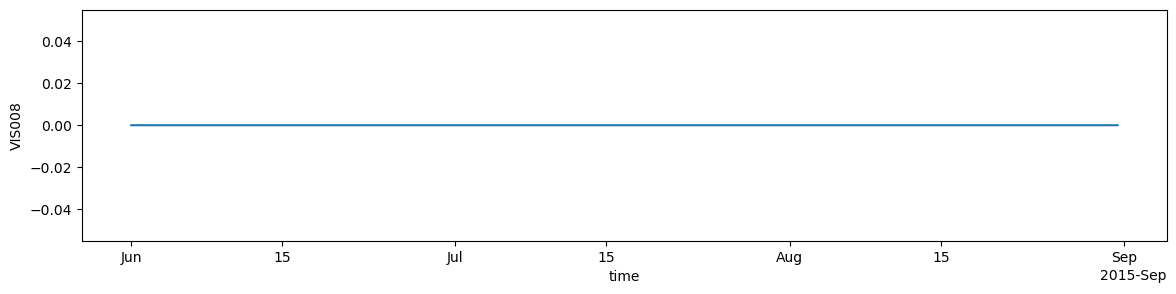

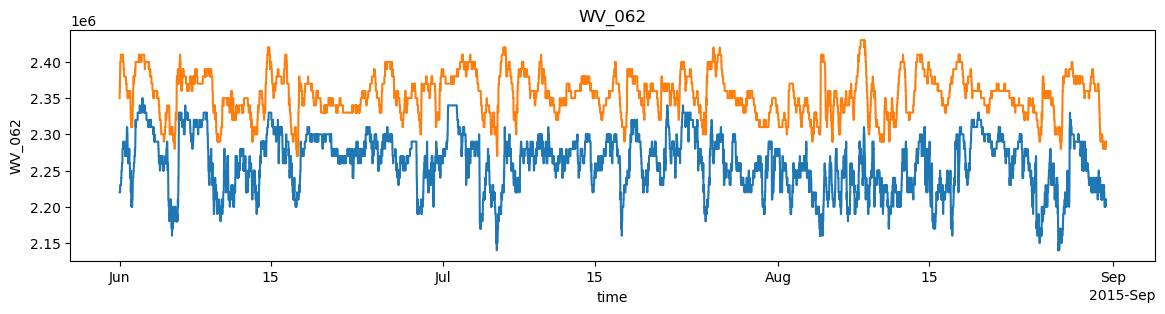

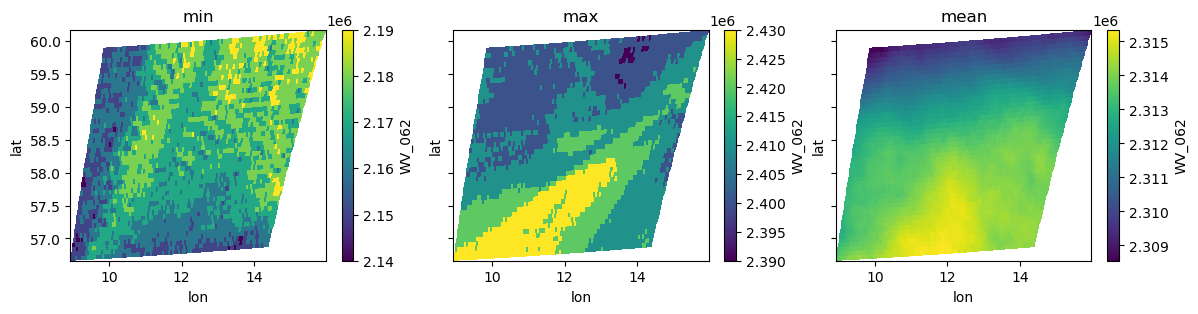

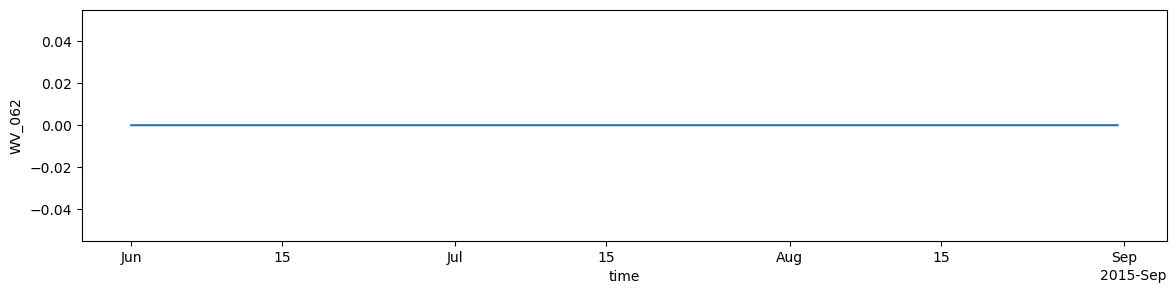

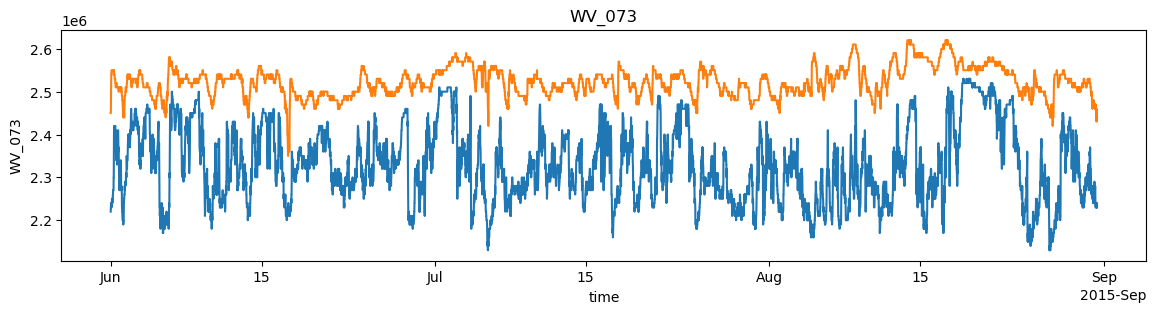

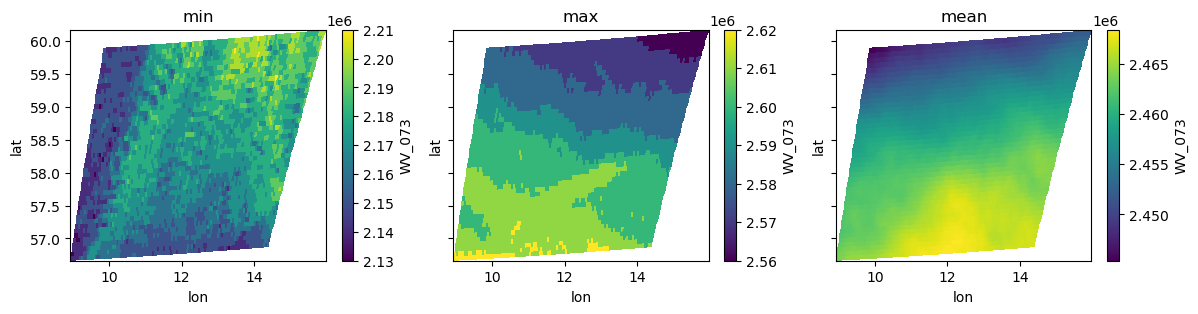

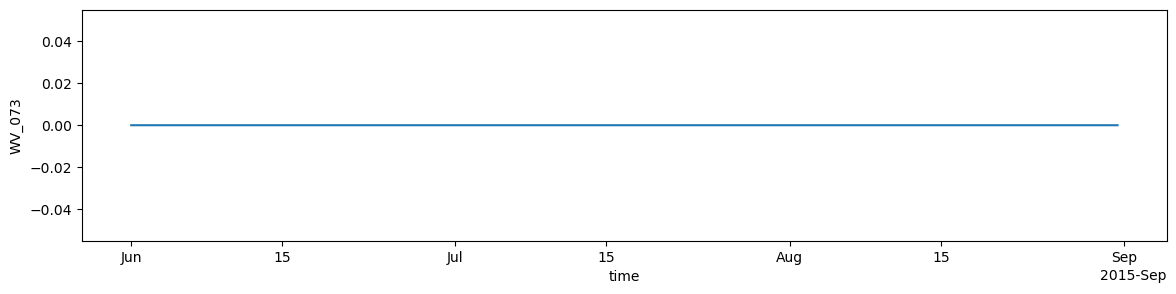

In [6]:
for var_name in sorted(ds_seviri.data_vars):
    fig, ax = plt.subplots(figsize=(14, 3))
    ds_seviri[var_name].min(dim=['x', 'y']).plot(ax=ax)
    ds_seviri[var_name].max(dim=['x', 'y']).plot(ax=ax)
    ax.set_title(var_name)
    fig, axs = plt.subplots(1, 3, figsize=(14, 3), sharex=True, sharey=True)
    ds_seviri[var_name].min(dim=['time']).plot(ax=axs[0], x='lon', y='lat')
    axs[0].set_title('min')
    ds_seviri[var_name].max(dim=['time']).plot(ax=axs[1], x='lon', y='lat')
    axs[1].set_title('max')
    ds_seviri[var_name].mean(dim=['time']).plot(ax=axs[2], x='lon', y='lat')
    axs[2].set_title('mean')
    fig, ax = plt.subplots(figsize=(14, 3))
    ds_seviri[var_name].isnull().sum(dim=['x', 'y']).plot(ax=ax)
    print('\n\n\n\n\n')
    plt.show()